<a href="https://colab.research.google.com/github/MatheusOrange211/analise_dados_pense_2015/blob/main/Analise_dados_PeNSE_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE DE DADOS DA PESQUISA NACIONAL DA SAÚDE DO ESCOLA: PeNSE - 2015**



Desenvolvido por Matheus Naranjo Corrêa:
>**Contato**:
* matheusnaranjocorrea@gmail.com
* [LinkedIn](https://www.linkedin.com/in/matheus-naranjo-35ab22188/)
* [GitHub](https://github.com/MatheusOrange211)
* [Instagram](https://www.instagram.com/matt_naranjo07/)



#RESUMO
Olá! Eu sou o  Matheus, aluno do curso de Ciências da Computação pela Universidade Federal de Roraima e pelo Centro Universitário Unifacvest e aluno do curso do Bootcamp Alura de DataScience Aplicada. Neste projeto, iremos mergulhar nos dados referentes ao PeNSE 2015, promovido pelo IBGE. O intuito é analisar um pouquinho as perguntas promovidas aos estudantes e entender melhor como andam os comportamentos dos jovens estudantes no Brasil. É importante destacar que essa **amostra** se refere ao ano de 2015, sendo a última pesquisa realizada até o momento.
Neste projeto utilizamos a linguagem de programação **Python**, além da biblioteca para análise de dados **Pandas** além da biblioteca responsável por cálculos matemáticos **Numpy**, além do **MatPlotLib** e **Seaborn**.

#O que é o PeNSE 2015?
>Investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  
<br>
A Pesquisa Nacional de Saúde do Escolar - PeNSE teve início em 2009, fruto de parceria com o Ministério da Saúde e apoio do Ministério da Educação. Na primeira edição, os escolares do 9o ano do ensino fundamental (antiga 8a série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo. A escolha do 9o ano do ensino fundamental, cabe destacar, teve como justificativa o mínimo da escolarização necessária para responder questionário autoaplicável e também a proximidade da idade de referência preconizada pela Organização Mundial da Saúde - OMS (World Health Organization - WHO), que é de 13 a 15 anos.<br>
Em 2012, embora mantida sua população-alvo, a PeNSE passou a abarcar dados para o conjunto do País e as Grandes Regiões, e a investigar, também, algumas características do ambiente escolar e do entorno. Na edição de 2015, importantes inovações foram introduzidas na pesquisa, dentre as quais se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: escolares frequentando o 9o ano do ensino fundamental e escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio.
<br>Mais informações, clique [aqui](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e)

#IMPORTANDO BIBLIOTECAS E CONFIGURAÇÕES INICIAIS

Para baixar os dados, clique [aqui](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
sns.set()

#IMPORTANDO OS DADOS

In [3]:
dados_github_1 ="https://github.com/MatheusOrange211/analise_dados_pense_2015/raw/main/PENSE_AMOSTRA2_ALUNO.CSV"
dados_github_2 = "https://github.com/MatheusOrange211/analise_dados_pense_2015/raw/main/PENSE_AMOSTRA2_ESCOLA.CSV"

In [4]:
dados_aluno_escola = pd.read_csv(dados_github_1,sep=';',thousands='.',decimal=',')
dados_aluno_escola

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2015,76,5,1,2,4,12,8,8,1,1,7,5,2,-1,1,1,1,1,1,1,3,1,3,1,2,2,6,3,8,7,5,8,7,5,1,2,1,-1,2,...,2,1,1,1,1,4,1,2,1,1,1,7,1,1,2,2,2,2,2,2,1,2,2,2,567.0,1679.0,56.7,167.9,2,2,521,5,447.815539,1,2,4,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,1,7,4,2,-1,2,1,1,1,1,1,3,1,3,1,1,2,5,4,6,2,4,1,6,1,1,6,4,-1,2,...,2,1,2,1,1,4,1,2,1,2,5,12,1,-1,2,2,1,2,2,2,2,2,2,2,619.0,1858.0,61.9,185.8,2,2,521,5,592.507440,1,2,4,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,1,7,4,2,-1,1,2,1,1,1,2,3,1,3,1,2,2,5,4,8,1,8,2,8,1,1,5,5,-1,2,...,2,4,1,5,5,4,1,7,3,1,5,-1,1,-1,2,2,2,2,2,2,1,2,2,2,609.0,1594.0,60.9,159.4,2,3,521,5,401.131512,1,2,4,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,1,7,4,2,-1,1,1,1,1,1,1,3,2,3,1,1,2,5,3,7,5,6,4,8,7,3,1,5,-1,2,...,2,3,2,3,4,4,2,-1,1,1,2,7,1,-1,1,1,2,2,2,2,1,2,2,2,473.0,1578.0,47.3,157.8,2,2,521,5,442.718091,1,2,4,1,16555,371,117


In [5]:
dados = pd.read_csv(dados_github_2,sep=';',thousands='.',decimal=',')
dados

,ANOPESQ,PAIS,REGEOGR,V0006,V0007,V0008,VE01P3001,VE01P3002,VE01P3003,VE01P3004,VE01P31,VE01P32,VE01P03A01,VE01P03A02,VE01P03A03,VE01P03A04,VE01P02A,VE01P04A,VE01P01,VE01P05A,VE01P06A,VE01P33,VE01P09,VE01P10A,VE01P23,VE01P24A,VE01P34,VE01P35,VE01P15A,VE01P16A,VE01P17A,VE01P18A,VE01P20,VE01P19,VE01P36,VE01P21,VE01P37,VE01P22,VE01P38,VE01P39,...,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
0,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,299.735235,1,1,296
1,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,355.170081,2,1,296
2,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,299.735235,3,1,296
3,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,355.170081,4,1,296
4,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,299.735235,5,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,447.815539,16552,371,117
16552,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,592.507440,16553,371,117
16553,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,401.131512,16554,371,117
16554,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,442.718091,16555,371,117


#FUNÇÕES USADAS

Cria uma tabela com coluna de frequencia e porcentagem, podendo também aceitar um dicionário de dados para substituir campos com códigos da pergunta, além de um título.

In [6]:
def formated_table(dataset : pd.DataFrame, dicionario : dict  = None, title_index :str = None):
  frequency = dataset.value_counts()
  percentage = (dataset.value_counts(normalize=True) * 100).round(3)
  final_dataset = pd.DataFrame({"Frequencia":frequency,"Porcentagem":percentage})

  if dicionario:
    final_dataset.rename(index = dicionario, inplace = True)
  
  if title_index:
    final_dataset.rename_axis(title_index,axis=1,inplace=True)
  
  return final_dataset

Função que realiza os crosstabs e já substitui os campos requeridos pelos respecitos dicionários 

In [7]:
def crosstab_data(dataset1: pd.DataFrame, dataset2:pd.DataFrame,normal:str = "index",dicio1:dict= None, dicio2: dict = None):
    dataframe = (pd.crosstab(dataset1,dataset2,normalize=f"{normal}")*100).round(2)
    
    if dicio1:
      dataframe.rename(index=dicio1,inplace=True)

    if dicio2:
      dataframe = dataframe.rename(columns=dicio2)
    
    return dataframe

Cria plots de pizza de maneira simples, bastando passar o dataframe e o título(se quiser)

In [8]:
def pie_chart(dataset : pd.DataFrame,title: str ='Gráfico com os dados'):
  fig,ax1 = plt.subplots()
  fig.set_size_inches(17,9)
  ax1.pie(dataset['Porcentagem'],
          colors=["#118ab2","#ef476f","#ffd166","#06d6a0"],
          labels=dataset.index,
          autopct='%1.2f%%',
          startangle=90,
          textprops={'fontsize': 18,
                      'color':'black'})

  ax1.set_title(f"{title}",
                size=20)

  plt.tight_layout()
  return ax1;

#DICIONÁRIO COM AS PERGUNTAS

In [9]:
dicio_vb01001 = {1:"MASCULINO",2:"FEMININO"}

dicio_vb01003 = {
  11:	"11 anos ou menos",
  12:	"12 anos",
  13:	"13 anos",
  14:	"14 anos",
  15:	"15 anos",
  16:	"16 anos", 
  17:	"17 anos",
  18:	"18 anos",
  19:	"19 anos ou mais"
}

dicio_REGEOGR ={
  1: 	"Norte",
  2:	"Nordeste",
  3:	"Sudeste",
  4:	"Sul",
  5:	"Centro-Oeste"
}
dicio_V008 = {
    1 : "Federal",
    2:  "Estadual",
    3:  "Municipal",
    4:  "Privada"
}

dicio_VE01P02A = {
  -2: "Dados não disponíveis",
  1	: "Até 50 alunos",
  2 :	"De 51 a 100 alunos",
  3	: "De 101 a 200 alunos",
  4 : "De 201 a 500 alunos",
  5 :	"De 501 a 1.000 alunos",
  6 :	"Mais de 1.000 alunos",
  9 :	"Não informado"
}
dicio_VE01P01 ={
  -2:"	Dados não disponíveis",
  -1:	"Não tem mensalidade",
  2:	"Até R$ 394,00",
  3:	"Mais de R$ 394,00 até R$ 788,00",
  4:	"Mais de R$ 788,00 até R$ 1.576,00",
  5:  "Mais de R$ 1.576,00 até R$ 3.152,00",
  6:	"Mais de R$ 3.152,00 até R$ 6.304,00",
  7:	"Mais de R$ 6.304,00",
  9:	"Não informado"
}
dicio_VE01P05A = {
    1: "sim",
    2: "Não está em condição de uso",
    3: "Não tem Biblioteca"
}

dicio_VE01P06A = {
    -2: "Dados Não Disponíveis",
     1: "sim",
     2: "Não está em condições de uso",
     3: "Não tem sala ou laboratório de Informática",
     9: "Não informado"
}
dicio_VE01P33 ={
  -2:	"Dados não disponíveis",
  1:	"Não existem computadores em condições de uso para os alunos",
  2:	"Até 10 computadores",
  3:	"De 11 a 20 computadores",
  4:	"De 21 a 30 computadores",
  5:	"De 31 a 40 computadores",
  6:	"De 41 a 50 computadores",
  7:	"Mais de 50 computadores",
  9:	"Não informado"
}

dicio_VE01P10A = {
    -2: "Dados Não Disponíveis",
     1: "sim",
     2: "Não está em condições de uso",
     3: "Não tem sala de recursos de mídia/comunicação",
     9: "Não informado"
}    
dicio_VE01P15A = {
  -2:	"Dados não disponíveis",
  1:  "Sim",
  2:	"Não está em condições de uso",
  3:	"Não tem quadra de esportes",
  9:	"Não informado"
}
dicio_VE01P40 = {
  -2:	"Dados não disponíveis",
  1:	"Sim",
  2:	"Não",
  9:	"Não informado"
}
dicio_VE01P4101 = {
  -2:	"Dados não disponíveis",
  -1: "Pulo no questionario",
  1:	"Sim",
  2:	"Não",
  9:	"Não informado"
}

#ANÁLISES

## 1 - **Quem são os nossos entrevistados?**

**Percentual de alunos do sexo Masculino e Feminino**

Primeiramente, precisamos deixar bem claro o que temos nos nossos dados. A informações abaixo nos mostram a distribuição dos nossos alunos em relação a sexo e idade. Essas são informações básicas que servirão para nos dar um entendimento inicial sobre o que estamos analisando com que público e com que idade.

In [10]:
DF_sexo_alunos = formated_table(dados_aluno_escola["VB01001"],dicio_vb01001,"Sexo")
DF_sexo_alunos

Sexo,Frequencia,Porcentagem
MASCULINO,8287,50.054
FEMININO,8269,49.946


Quanto a idade dos alunos que foram entrevistados temos as seguintes informações

In [11]:
DF_idade_alunos = formated_table(dados_aluno_escola["VB01003"],dicio_vb01003,"Idade")
DF_idade_alunos

Idade,Frequencia,Porcentagem
12 anos,2634,15.910
13 anos,2561,15.469
15 anos,2425,14.647
16 anos,2270,13.711
14 anos,2133,12.884
11 anos ou menos,2072,12.515
17 anos,1537,9.284
18 anos,563,3.401
19 anos ou mais,361,2.180


Que visualmente podemos representar da seguinte forma

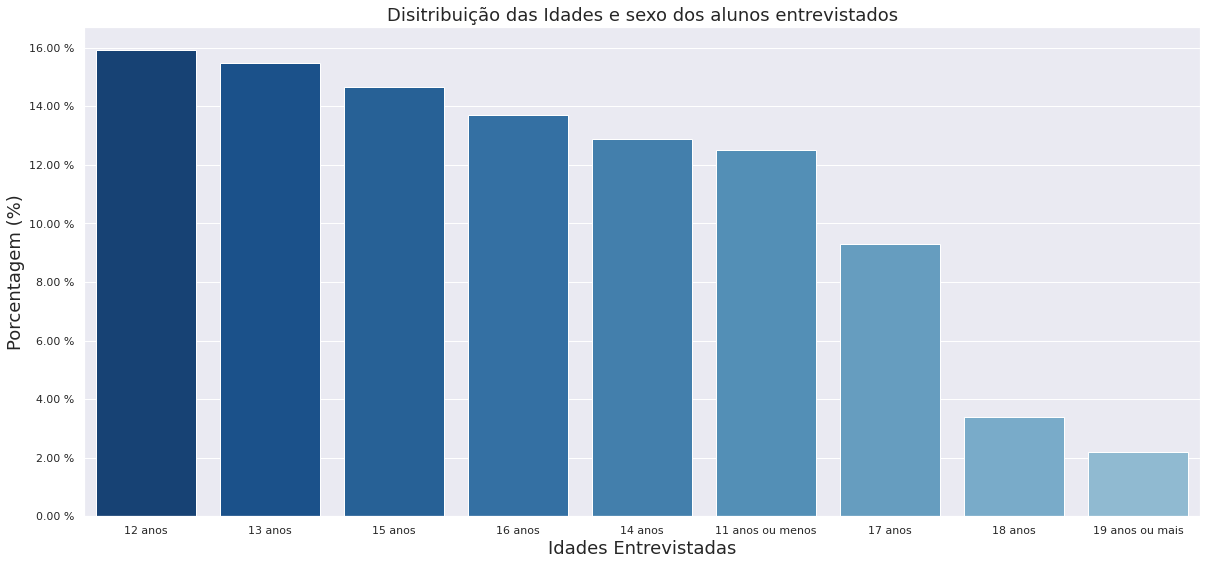

In [12]:
plt.figure(figsize=(20,9))
fig = sns.barplot(data=DF_idade_alunos,
                  x=DF_idade_alunos.index, 
                  y= 'Porcentagem',
                  palette= sns.color_palette("Blues_r",15))
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
plt.title("Disitribuição das Idades e sexo dos alunos entrevistados",size=18)
fig.set_ylabel("Porcentagem (%)",size=18)
fig.set_xlabel("Idades Entrevistadas",size=18)

fig;

Temos então acima uma boa forma de entender como estão distribuídos a idade dos alunos de toda a nossa amostra. A maioria são alunos na idade de 12 e 13 anos. Podemos entender melhor essa distribuição de idade também com relação ao sexo e idade, conforme vemos abaixo.

In [13]:
DF_idade_pelo_sexo = (pd.crosstab(dados_aluno_escola['VB01003'],dados_aluno_escola['VB01001'],normalize='index') *100).round(2)
DF_idade_pelo_sexo.rename(index=dicio_vb01003,inplace=True)
DF_idade_pelo_sexo = DF_idade_pelo_sexo.rename(columns=dicio_vb01001)

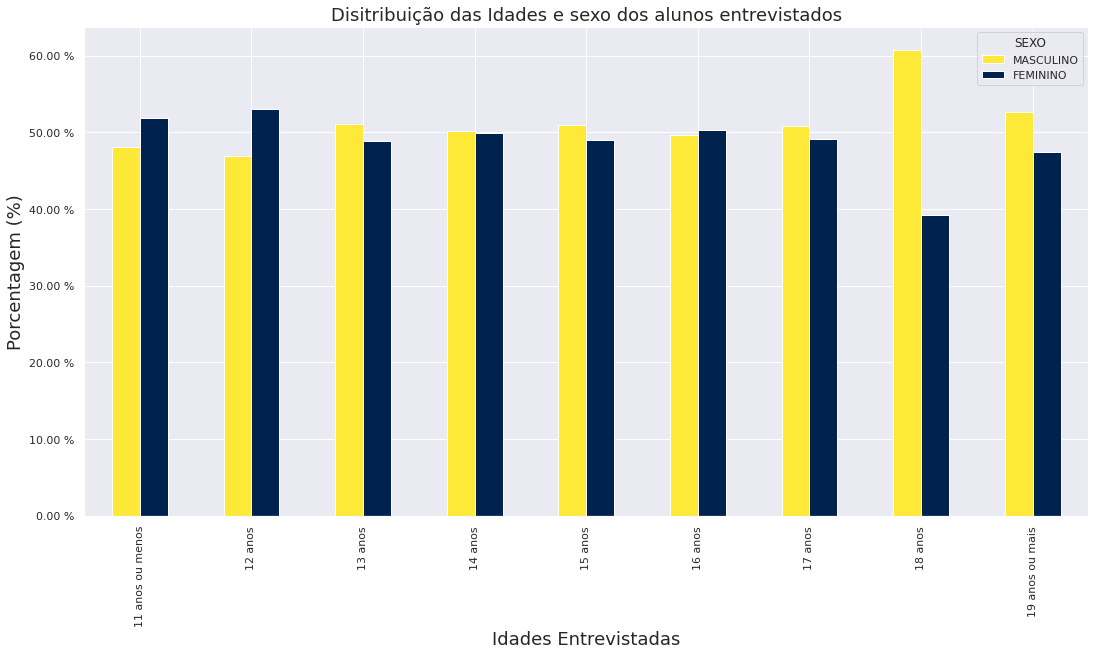

In [14]:
fig = DF_idade_pelo_sexo.plot(kind='bar',figsize=(18,9),colormap='cividis_r')
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
plt.title("Disitribuição das Idades e sexo dos alunos entrevistados",size=18)
fig.set_ylabel("Porcentagem (%)",size=18)
fig.set_xlabel("Idades Entrevistadas",size=18)

plt.legend(title='SEXO')

fig;

Em nossa base, temos ainda a questão do número de escolas e número de alunos. Analisando a questão de alunos por escola, temos algumas informações:

In [15]:
aluno_por_escola = dados.groupby('escola')['aluno'].count()
aluno_por_escola = pd.DataFrame(aluno_por_escola)
aluno_por_escola.describe()

,aluno
count,371.000000
mean,44.625337
std,17.920916
min,4.000000
25%,33.000000
50%,48.000000
75%,57.000000
max,99.000000


* A média de aluno por escola é de 44.6;
* O desvio padrão é de aproximadamente 17.92;
* A mediana é 48;

Abaixo, temos uma melhor visualização com o boxplot.


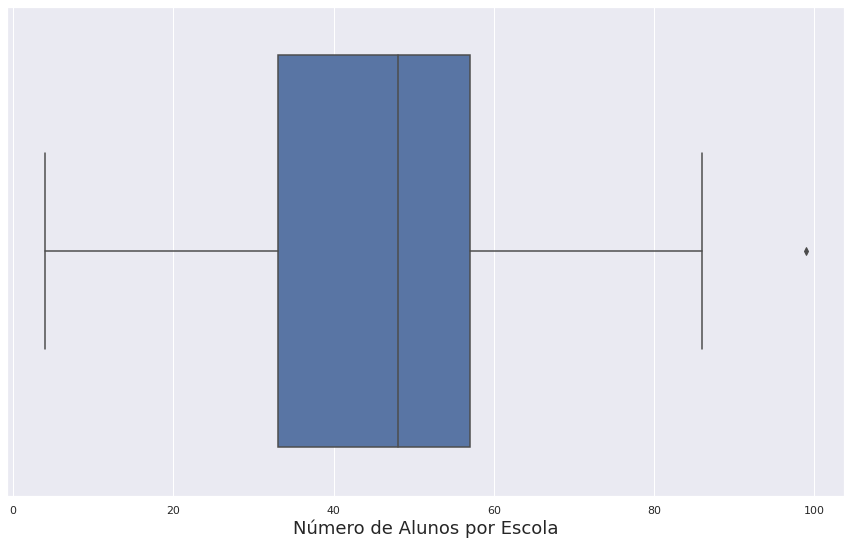

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(15,9)
ax = sns.boxplot(data=aluno_por_escola,x = aluno_por_escola["aluno"])
ax.set_xlabel("Número de Alunos por Escola",size=18)

fig;

###1.1 - Aonde se situam as escolas entrevistadas

Primeiro vamos descobrir aonde se situam a maioria das escolas entrevistadas

In [17]:
formated_table(dados['REGEOGR'],dicio_REGEOGR,"REGIÃO AONDE SE SITUA")

REGIÃO AONDE SE SITUA,Frequencia,Porcentagem
Nordeste,3465,20.929
Centro-Oeste,3420,20.657
Sudeste,3276,19.787
Sul,3207,19.371
Norte,3188,19.256


#### 1.1.1 - Região Urbana X Região Rural

Temos que a maioria das escolas, por uma pequena diferença de menos 1%, situa-se na região nordeste, logo seguido da região centro-oeste. Uma pergunta que já podemos fazer é: ** das escolas entrevistadas, quantas são de região urbana e região Rural?**

In [18]:
crosstab_data(dados['REGEOGR'],dados["V0006"], dicio1=dicio_REGEOGR, dicio2={1:"Urbano",2:"Rural"})

V0006,Urbano,Rural
REGEOGR,,
Norte,92.06,7.94
Nordeste,92.64,7.36
Sudeste,98.02,1.98
Sul,99.03,0.97
Centro-Oeste,92.78,7.22


Sabemos então que quase 8% das escolas das zona rural encontram-se na região norte e pouco menos de 1% na região sul. No total, **Quanto cada região (Norte, Nordeste...) representa no somatório total no que tange aos locais de ensino?**

In [19]:
crosstab_data(dados['REGEOGR'],dados["V0006"], normal="columns" ,dicio1=dicio_REGEOGR, dicio2={1:"Urbano",2:"Rural"})

V0006,Urbano,Rural
REGEOGR,,
Norte,18.69,29.73
Nordeste,20.44,29.96
Sudeste,20.45,7.64
Sul,20.22,3.64
Centro-Oeste,20.20,29.02


De todas as escolas entrevistadas, 29.73% das escolas da zona rural se encontram situadas na região norte, seguido do centro-oeste. Em relação a zona urbana, a região norte possui a menor porcentagem.<br>


### 1.2 - Rede de ensino Público e Privado

Ainda em relação as escolas: **Qual a porcentagem das escolas públicas e privadas para cada região e qual a participação geral que cada região representa para cada tipo de escola?**

In [20]:
escola_info = crosstab_data(dados['REGEOGR'],dados["V0007"], normal="index" ,
                            dicio1=dicio_REGEOGR,
                            dicio2={1:"Público_regiao",2:"Privada_regiao"})

escola_info[["PUBLICO_GERAL","PRIVADO_GERAL"]] = crosstab_data(dados['REGEOGR'],
                                                               dados["V0007"], 
                                                               normal="columns" ,
                                                               dicio1=dicio_REGEOGR,
                                                               dicio2={1:"Público",2:"Privada"})


escola_info

V0007,Público_regiao,Privada_regiao,PUBLICO_GERAL,PRIVADO_GERAL
REGEOGR,,,,
Norte,78.54,21.46,20.22,16.38
Nordeste,72.87,27.13,20.39,22.51
Sudeste,70.12,29.88,18.55,23.45
Sul,78.61,21.39,20.36,16.43
Centro-Oeste,74.09,25.91,20.47,21.22


Temos muitas informações interessantes para analisar. Primeiramente, mais de 70% das escolas para todas as regiões, que foram entrevistadas, são da rede pública. No que tange a valores gerais, as escolas da rede pública da região sudeste, representam pouco mais de 18,50% do total de escolas públicas em todo território nacional que foram entrevistadas. Quantos as privadas, a região sudeste é a que teve mais escolas entrevistadas e é também a com maior participação no que tange ao número de escolas privadas geral (ou seja, somando todas as escolas privadas entrevistadas no Brasil), totalizando 23.45%. Abaixo, temos duas representaçõe que nos ajudam a entender melhor essa participação geral de cada região para cada rede de ensino.

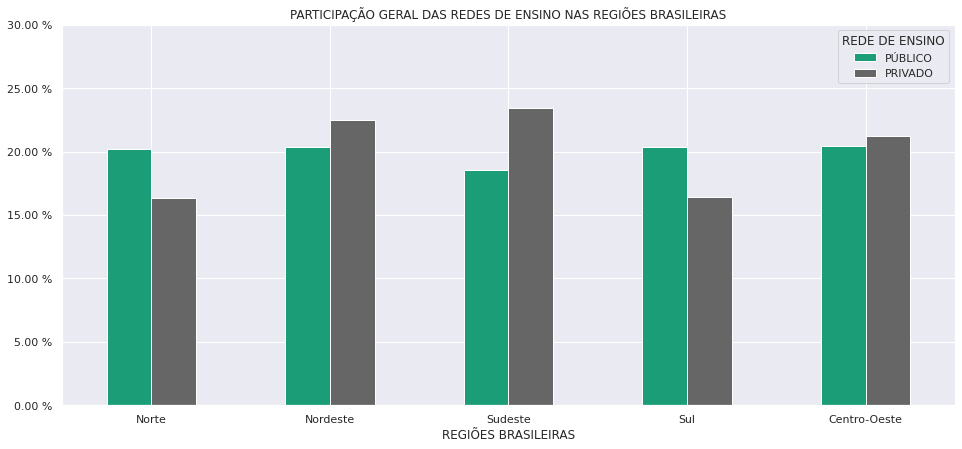

In [21]:
ax = escola_info[["PUBLICO_GERAL","PRIVADO_GERAL"]].plot(kind="bar",figsize=(16,7),colormap="Dark2")
plt.legend(title="REDE DE ENSINO",labels=["PÚBLICO","PRIVADO"])

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))

plt.xticks(rotation=0)
plt.xlabel("REGIÕES BRASILEIRAS")
plt.ylim(0,30)
plt.title("PARTICIPAÇÃO GERAL DAS REDES DE ENSINO NAS REGIÕES BRASILEIRAS")
plt.show()

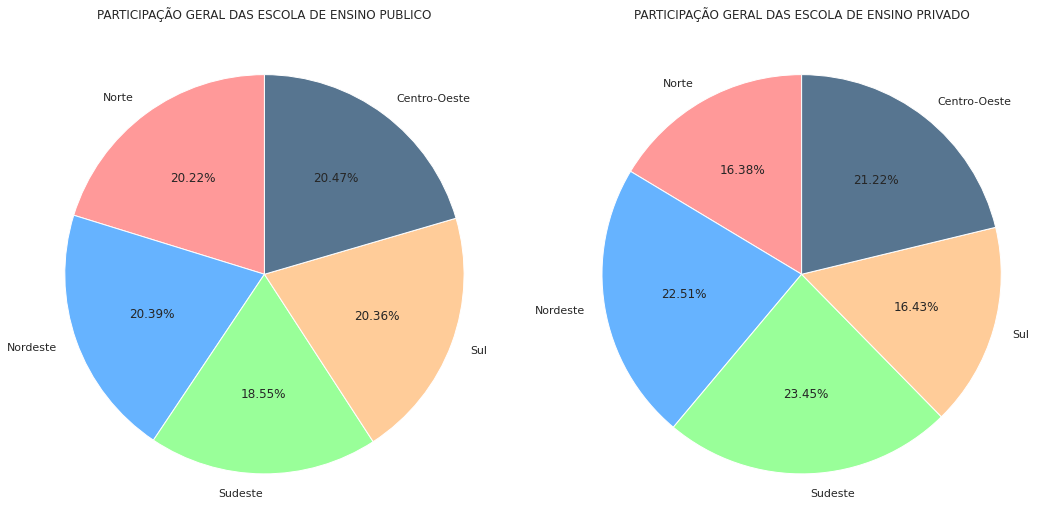

In [22]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#577590']

fig,(ax1,ax2) = plt.subplots(1,2)
fig = plt.gcf()
fig.set_size_inches(15,9)

ax1.pie(escola_info["PUBLICO_GERAL"],colors=colors,labels=escola_info.index, autopct='%1.2f%%',startangle=90)
ax1.set_title("PARTICIPAÇÃO GERAL DAS ESCOLA DE ENSINO PUBLICO")

ax2.pie(escola_info["PRIVADO_GERAL"],colors=colors,labels=escola_info.index, autopct='%1.2f%%',startangle=90)
ax2.set_title("PARTICIPAÇÃO GERAL DAS ESCOLA DE ENSINO PRIVADO")

plt.tight_layout()
plt.show()

###1.3 - Esfera Administrativa da Escola

Dentro da nossa Amostra, temos algumas boas informações relacionadas voltadas a esfera que administra cada uma das escolas da nossa pesquisa.

In [23]:
administracao_escola = formated_table(dados['V0008'],dicio_V008)
administracao_escola 

,Frequencia,Porcentagem
Estadual,9009,54.415
Privada,4175,25.217
Municipal,3072,18.555
Federal,300,1.812


Mais da metade de toda amostra são escola estaduais. Apenas 1.8% são de administração Federal.

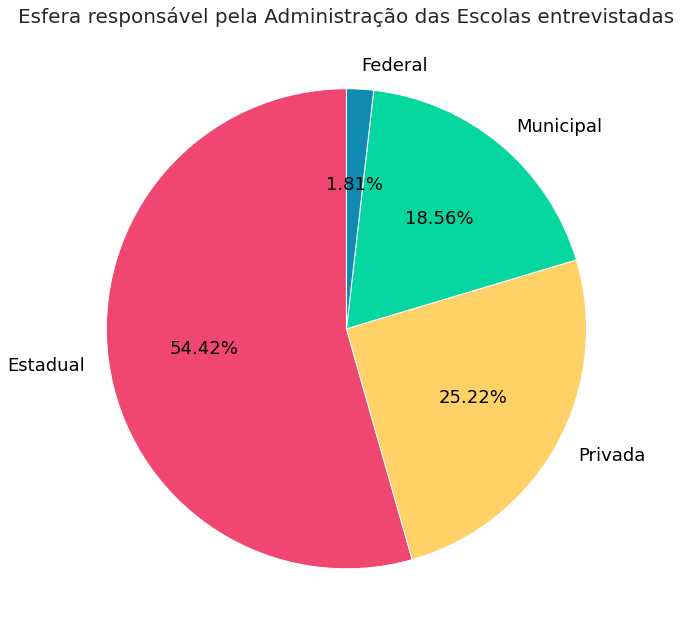

In [24]:
fig,ax1 = plt.subplots()
fig.set_size_inches(17,9)
ax1.pie(administracao_escola['Porcentagem'],
        colors=["#ef476f","#ffd166","#06d6a0","#118ab2"],
        labels=administracao_escola.index,
        autopct='%1.2f%%',
        startangle=90,
        textprops={'fontsize': 18,
                    'color':'black'})

ax1.set_title("Esfera responsável pela Administração das Escolas entrevistadas",
              size=20)

plt.tight_layout()
ax1;

### 1.4 - **Total de Alunos Matriculados nas Escolas**

Vejamos então algumas outras informações básicas sobre as escolas que fizeram parte da nossa entrevista. Por exemplo, **O total de alunos matriculados nas escolas**.

In [25]:
escola_quantindade_alunos = formated_table(dados["VE01P02A"],dicio_VE01P02A)
escola_quantindade_alunos

,Frequencia,Porcentagem
Mais de 1.000 alunos,7072,42.716
De 501 a 1.000 alunos,5927,35.800
De 201 a 500 alunos,3031,18.308
De 101 a 200 alunos,395,2.386
De 51 a 100 alunos,103,0.622
Até 50 alunos,28,0.169


- Mais de 42% das escolas entrevistadas possuem mais de 1000 alunos
- Mais de 54% das escolas possuem entre 201 até 1000 alunos.
- Cerca de 3.18% das escolas tem até 200 alunos.

### 1.5 - **Qual a faixa de mensalidade das escolas privadas?**

Vamos investigar um dado curioso relacionado as mensalidades escolares de algumas escolas. A pergunta da enquente é: **Qual a faixa de valor da mensalidade do 9º ano na escola? (se não houver 9º ano, considerar 1º ano do Ensino Médio)**

In [26]:
crosstab_data(dados["VE01P01"],dados["V0007"],normal="columns",dicio1=dicio_VE01P01,dicio2={1:"PÚBLICO",2:"PRIVADO"})

V0007,PÚBLICO,PRIVADO
VE01P01,,
Não tem mensalidade,100.0,0.00
"Até R$ 394,00",0.0,17.44
"Mais de R$ 394,00 até R$ 788,00",0.0,53.94
"Mais de R$ 788,00 até R$ 1.576,00",0.0,16.43
"Mais de R$ 1.576,00 até R$ 3.152,00",0.0,4.19
Não informado,0.0,8.00


Obviamente que escolas da rede pública não teriam cobrança de mensalidade e que escolas da rede privada teriam. Observando a tabela notamos que quase 54% escola de rede privada possuem mensalidades na faixa de 394,00 até R$788,00. 

#### 1.5.1 - Escolas com um número x de alunos e que pagam um intervalo y de mensalidades

In [27]:
mensalidade_quantidade_alunos = crosstab_data(dados["VE01P01"],dados["VE01P02A"],dicio1= dicio_VE01P01,dicio2= dicio_VE01P02A)
mensalidade_quantidade_alunos

VE01P02A,Até 50 alunos,De 51 a 100 alunos,De 101 a 200 alunos,De 201 a 500 alunos,De 501 a 1.000 alunos,Mais de 1.000 alunos
VE01P01,,,,,,
Não tem mensalidade,0.12,0.83,2.20,16.57,37.36,42.91
"Até R$ 394,00",0.00,0.00,13.74,37.36,19.64,29.26
"Mais de R$ 394,00 até R$ 788,00",0.58,0.00,1.02,23.13,32.10,43.16
"Mais de R$ 788,00 até R$ 1.576,00",0.00,0.00,0.00,8.89,23.32,67.78
"Mais de R$ 1.576,00 até R$ 3.152,00",0.00,0.00,0.00,37.71,0.00,62.29
Não informado,0.00,0.00,0.00,17.66,82.34,0.00


Temos um dataframe que nos indica a porcentagem de escolas com um número x de alunos e que pagam um intervalo y de mensalidades. Na primeira linha ("NÃO TEM MENSALIDADE") somos apresentados a dados de escolas públicas. Escols públicas de até 50 alunos ou de mais de mil alunos. Todas elas não possuem um valor mensal a ser compensado pelo frenquentamento. Diferentemente das outras linhas e com exceção da última, temos algumas porcentagens que nos revelam quantos porcento as escolas da rede privada de até 500 alunos, por exemplo, paga em média de mensalidade.
Logo, Pagam em média os valores:
* Na faixa Mensalidade de até 394,00 reais para escolas de 201 até 500 alunos: **37.36 %**
* Na faixa de Mensalidade de Mais de R\$ 788,00 até R\$ 1.576,00 para escolas de Mais de 1000 alunos: **67.78 %**
* Na faixa de Mensalidade de Mais de R\$ 1.576,00 até R\$ 3.152,00	 para escolas de Mais de 1000 alunos: **62.29 %**

## 2- **Condições das Escolas**

### 2.1 - A escola possui biblioteca?

Continuando nossa análise, vamos ver uma pergunta que aborda a existência ou não de uma biblioteca nas escolas (EM CONDIÇÕES DE USO), seja pública ou particular.

In [28]:
escolas_bibliotecas = formated_table(dados['VE01P05A'],dicio_VE01P05A)
escolas_bibliotecas

,Frequencia,Porcentagem
sim,13581,82.031
Não está em condição de uso,1691,10.214
Não tem Biblioteca,1284,7.755


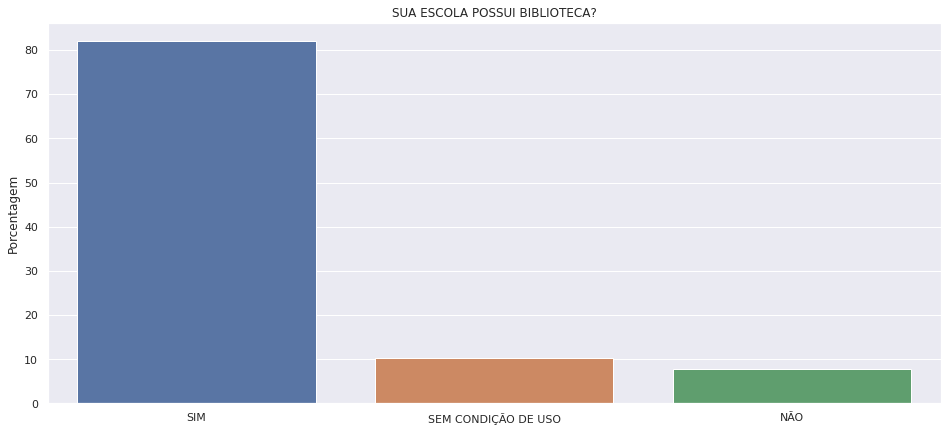

In [29]:
plt.figure(figsize=(16,7))
fig = sns.barplot(data=escolas_bibliotecas,x = escolas_bibliotecas.index,y='Porcentagem')
fig.set_xticklabels(labels = ["SIM","SEM CONDIÇÃO DE USO","NÃO"], rotation=0)
fig.set_title("SUA ESCOLA POSSUI BIBLIOTECA?")

fig;

Primeiramente temos que 82% das escolas (no geral) possuem bibliotecas. Entretanto, um dado preocupante e até mesmo assustador se levarmos em conta que mais de 16556 escolas foram entrevistadas, é que cerca de 17.9 % das escolas não possuem bibliotecas em condições de usou ou mesmo não possuem. Contudo, o impacto é ainda maior quando observamos as diferenças entre as escolas da rede pública e privada.

#### 2.1.1 - Rede de ensino Público X Rede de ensino Privado 

In [30]:
escolas_biblioteca_rede = crosstab_data(dados["VE01P05A"],dados["V0007"],normal="columns",dicio1=dicio_VE01P05A,dicio2={1:"PÚBLICO",2:"PRIVADO"})
escolas_biblioteca_rede

V0007,PÚBLICO,PRIVADO
VE01P05A,,
sim,80.23,87.38
Não está em condição de uso,11.50,6.40
Não tem Biblioteca,8.27,6.23


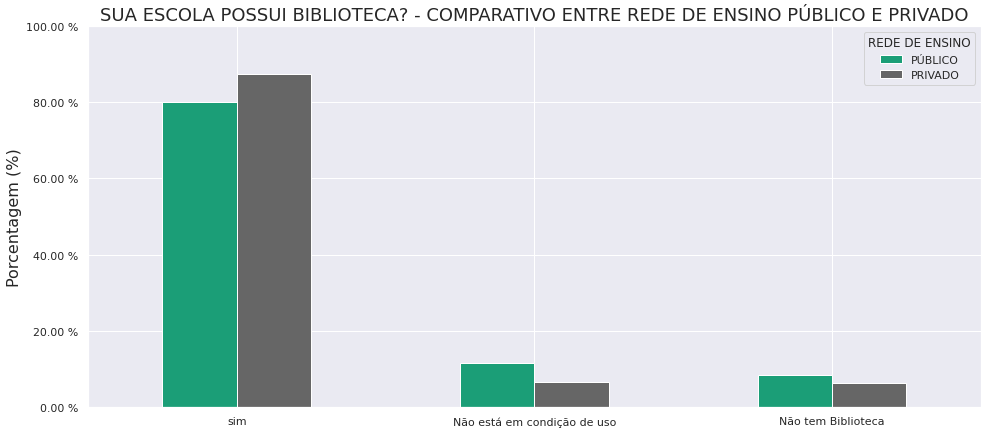

In [31]:
fig = escolas_biblioteca_rede[["PÚBLICO","PRIVADO"]].plot(kind="bar",figsize=(16,7),colormap="Dark2")
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
plt.ylim(0,100)
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Porcentagem (%)",size=16)

plt.legend(title="REDE DE ENSINO")

plt.title("SUA ESCOLA POSSUI BIBLIOTECA? - COMPARATIVO ENTRE REDE DE ENSINO PÚBLICO E PRIVADO",size=18)
plt.show()

Ao que tudo indica, as escolas da rede privada possuem mais bibliotecas do que a da rede pública, uma vez que as verbas de escolas públicas não são bem aproveitadas do que os valores de mensalidade que são aplicados nas particulares E isso, apenas na nossa amostra.

#### 2.1.2 - Esfera administrativa de ensino

Vejamos como a questão da escola possuir ou não biblioteca é refletida quanto a esfera de ensino (Federal, estadual, Municipal e privada).

In [32]:
crosstab_data(dados["VE01P05A"],dados["V0008"],normal="columns",dicio1=dicio_VE01P05A,dicio2=dicio_V008)

V0008,Federal,Estadual,Municipal,Privada
VE01P05A,,,,
sim,100.0,82.16,72.62,87.38
Não está em condição de uso,0.0,10.94,14.26,6.40
Não tem Biblioteca,0.0,6.89,13.12,6.23


Não é nenhuma surpresa que todas as escolas de nível federal tenham bibliotecas. Mas vale observar que 13% das escolas municipais não possuem.

### 2.2 - A escola possui Sala ou Laboratório de Informática?

Uma outra informação interessante de se analisar é com relação a pergunta de haver ou não salas/laboratório de informática nas escolas.

In [33]:
formated_table(dados["VE01P06A"],dicio_VE01P06A)

,Frequencia,Porcentagem
sim,12114,73.170
Não está em condições de uso,2666,16.103
Não tem sala ou laboratório de Informática,1776,10.727


73% das escolas entrevistadas informaram possuir salas ou laboratórios de informática. Contudo 26.83% informaram não estar em condições de uso ou mesmo não possuir.

#### 2.2.1 - Rede de Ensino Público X Rede de ensino Privado

E como isso é refletido nas escolas de ensino público e privado?

In [34]:
escola_possui_sala_informatica = crosstab_data(dataset1=dados["VE01P06A"],
              dicio1=dicio_VE01P06A,
              dataset2=dados["V0007"],
              dicio2={1:"Público",2:"Privado"},
              normal="columns")

escola_possui_sala_informatica

V0007,Público,Privado
VE01P06A,,
sim,73.82,71.23
Não está em condições de uso,19.90,4.84
Não tem sala ou laboratório de Informática,6.28,23.93


73% das escolas de ensino público informaram que possuem sim salas de informática em suas escolas. 71% das escolas de rede privada informaram que também possui. Curiosamente, quase 24% das escolas de rede privada informaram não possuir sala ou laboratório de informática.

ok, mas e quanto aos equipamentos?
**Quantos computadores (desktops, laptops, notebooks, netbooks, tablets) da escola e EM CONDIÇÕES DE USO estão disponíveis para os alunos em sala ou salas específicas de informática?**

In [35]:
num_computadores_por_escola = formated_table(dados["VE01P33"],dicio_VE01P33)
num_computadores_por_escola

,Frequencia,Porcentagem
De 11 a 20 computadores,5402,32.629
Até 10 computadores,2609,15.759
Não existem computadores em condições de uso para os alunos,2450,14.798
De 21 a 30 computadores,2395,14.466
Mais de 50 computadores,1517,9.163
De 31 a 40 computadores,1204,7.272
De 41 a 50 computadores,979,5.913


Acima temos algumas informações que mostram que 32.63% das escolas possuem 11 a 20 computadores e cerca de 14.47% não tem computadores em condição de uso. 
Abaixo, descartando a resposta de não haver computadores para condição de uso e de não ter computadores da escola, iremos realizar algumas contas.

In [36]:
dados_pc_sala = dados.query("VE01P06A == 1 and VE01P33 != 1 and VE01P33 != -2")
num_computadores = formated_table(dados_pc_sala["VE01P33"],dicio_VE01P33)
num_computadores["k"] = ["11 - 20","21-30","<=10"," >50","31-40","41-50"]
num_computadores["ordem"] = [1,2,0,5,3,4]
num_computadores = num_computadores.reset_index()
num_computadores = num_computadores.rename(columns={"index":"Respostas"})
num_computadores = num_computadores.set_index('ordem')
num_computadores = num_computadores.sort_index()
num_computadores["Frequencia_Relativa_Acumulada (%)"] = num_computadores["Porcentagem"].cumsum()
num_computadores

,Respostas,Frequencia,Porcentagem,k,Frequencia_Relativa_Acumulada (%)
ordem,,,,,
0,Até 10 computadores,1299,10.956,<=10,10.956
1,De 11 a 20 computadores,4853,40.929,11 - 20,51.885
2,De 21 a 30 computadores,2328,19.634,21-30,71.519
3,De 31 a 40 computadores,1113,9.387,31-40,80.906
4,De 41 a 50 computadores,979,8.257,41-50,89.163
5,Mais de 50 computadores,1285,10.837,>50,100.000


A frequência relativa acumulada nos revela que as respostas referentes a  ter:
* "Até 10 computadores"
* "De 11 a 20 Computadores"
* "De 21 a 30 computadores"

representam 71.5% do total de respostas para esta pergunta no que tange as frequencias.

###2.3 - A escola tem sala de recursos de mídia/comunicação EM CONDIÇÕES DE USO? (Exemplos: televisão, videocassete, dvd, projetor etc)


In [37]:
formated_table(dados["VE01P10A"],dicio_VE01P10A)

,Frequencia,Porcentagem
sim,12462,75.272
Não tem sala de recursos de mídia/comunicação,3658,22.095
Não está em condições de uso,436,2.633


In [38]:
crosstab_data(dataset1=dados["VE01P10A"],dataset2=dados["V0008"],normal="columns",dicio1=dicio_VE01P10A,dicio2=dicio_V008)

V0008,Federal,Estadual,Municipal,Privada
VE01P10A,,,,
sim,78.33,70.97,66.11,91.07
Não está em condições de uso,0.00,4.11,2.15,0.00
Não tem sala de recursos de mídia/comunicação,21.67,24.92,31.74,8.93


Temos que, com exceção das redes municipais, responderam sim mais de 70% das escolas em relação a pergunta de ter uma sala de recursos.

### 2.4 - A escola tem quadra de esportes EM CONDIÇÕES DE USO?

In [39]:
formated_table(dados["VE01P15A"],dicio_VE01P15A)

,Frequencia,Porcentagem
Sim,12716,76.806
Não tem quadra de esportes,2405,14.526
Não está em condições de uso,1435,8.668


Com uma porcentagem de 76.80% das escolas possuem quadra. Pouco mais de 21% afirmaram não possuir.

Continuando ainda no tema. Respondendo sim para a pergunta anterior, em relação as quadras, independente da quantidade, todas são cobertas?


In [40]:
num_quadra_coberta = dados.query("VE01P15A == 1 and VE01P17A == 5")
num_quadra_coberta = num_quadra_coberta.shape[0]
print(f"Temos que das 12716 escolas que responderam possuir quadra,\n\
{num_quadra_coberta} delas são cobertas, independentemente da quantidade \
existente, representando  cerca de {(num_quadra_coberta/12716)*100:.2f} %.")

Temos que das 12716 escolas que responderam possuir quadra,
399 delas são cobertas, independentemente da quantidade existente, representando  cerca de 3.14 %.


##3 - A escola e os alunos com atenção especial. Como é essa relação?

Vamos entender um pouco melhor como as escolas responderam as perguntas referentes a alunos que necessitam de uma atenção maior. Perguntas do tipo: se o aluno possui deficiência, se a escola oferece atividades fisicas voltadas especificamente a criança e etc.

#### 3.1 - A escola possui alunos com deficiência ou com transtorno global do desenvolvimento?

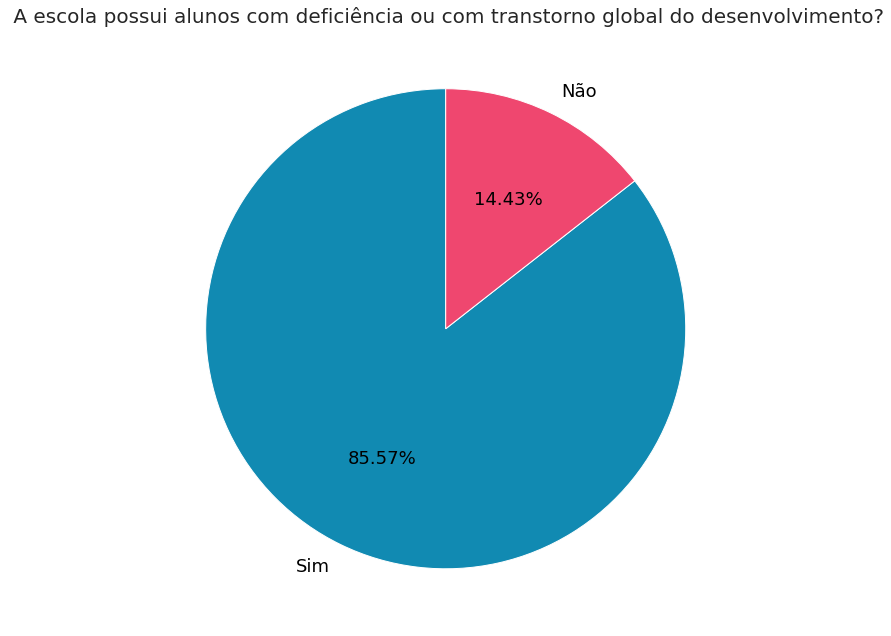

In [41]:
titulo =" A escola possui alunos com deficiência ou com transtorno global do desenvolvimento?"
pie_chart(formated_table(dados["VE01P40"],dicio_VE01P40),titulo)

Temos então que 85.5% das escolas possuem alunos com deficiência. Mas especificamente estão em escolas de que tipo? rede pública ou privada?

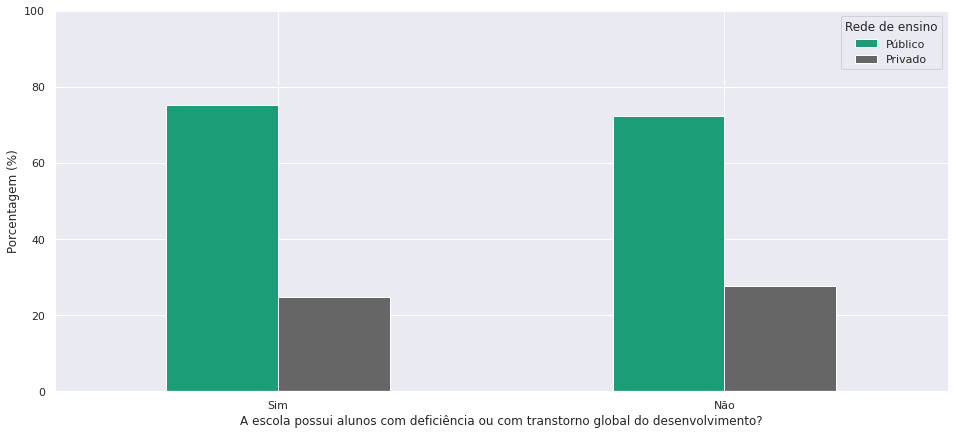

In [42]:
escola_alunos_deficientes  = crosstab_data(dataset1=dados["VE01P40"],
              dicio1=dicio_VE01P40,
              dataset2=dados["V0007"],
              dicio2={1:"Público",2:"Privado"})

escola_alunos_deficientes.plot(kind="bar",figsize=(16,7),colormap="Dark2")
plt.legend(title="Rede de ensino")
plt.xticks(rotation=0)
plt.xlabel("A escola possui alunos com deficiência ou com transtorno global do desenvolvimento?")
plt.ylabel("Porcentagem (%)")
plt.ylim(0,100)
plt.show()

Temos então que responderam sim 75% das escolas de ensino Público e 24.82% da rede privada.

Abaixo, temos algumas outras peruguntas que foram feitas com relação as escolas e alunos com deficiência


####3.2 - A escola possui alunos com deficiência intelectual?

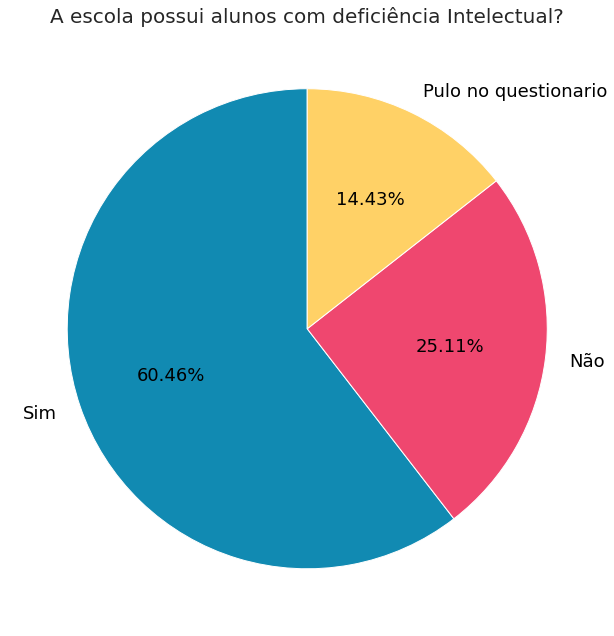

In [43]:
pie_chart(formated_table(dados["VE01P4101"],dicio_VE01P4101),"A escola possui alunos com deficiência Intelectual?")

####3.3 - A escola possui alunos com transtornos do espectro do autismo?

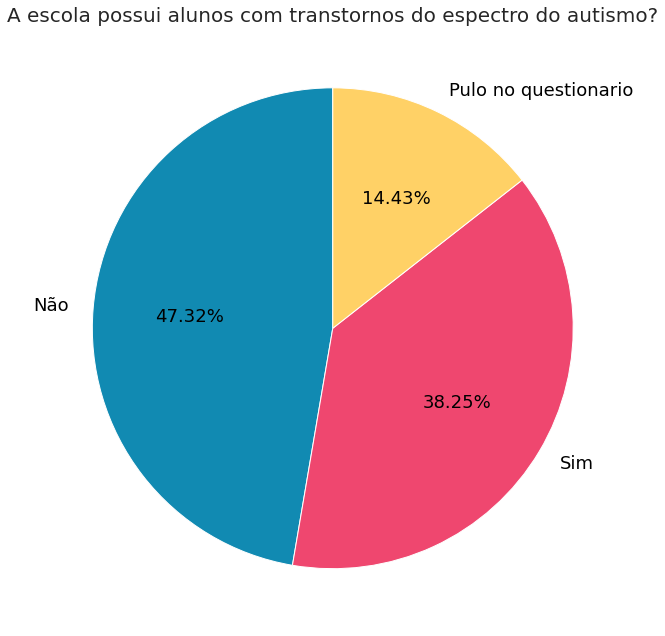

In [44]:
titulo ="A escola possui alunos com transtornos do espectro do autismo?"
pie_chart(formated_table(dados["VE01P4102"],dicio_VE01P4101),titulo)

####3.4 -A escola possui alunos com transtornos mentais e de comportamento?

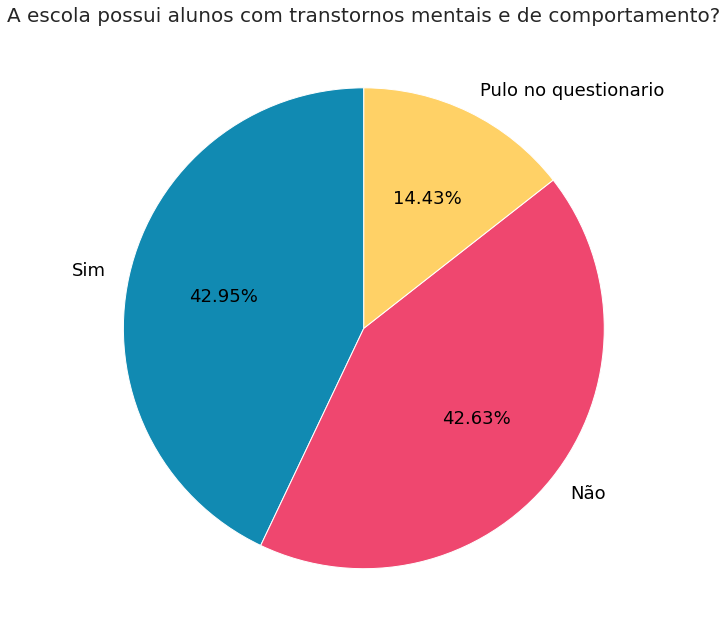

In [45]:
titulo = "A escola possui alunos com transtornos mentais e de comportamento?"
pie_chart(formated_table(dados["VE01P4103"],dicio_VE01P4101),titulo)

####3.5 - A escola possui alunos com deficiência física?

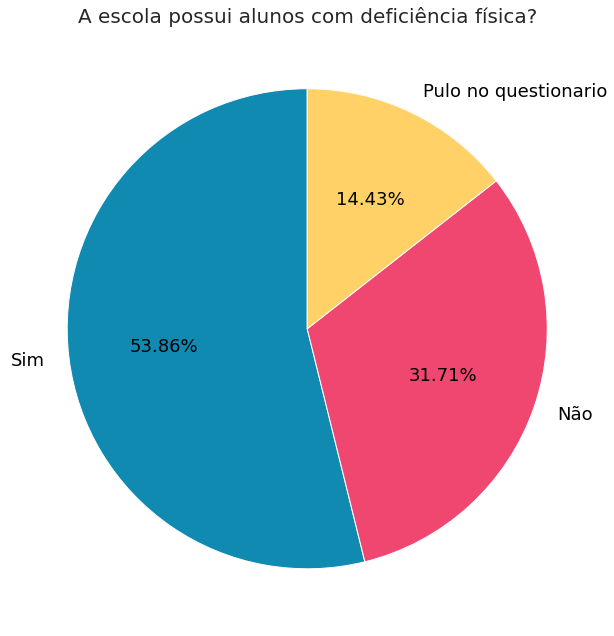

In [46]:
titulo= "A escola possui alunos com deficiência física?"
pie_chart(formated_table(dados["VE01P4104"],dicio_VE01P4101),titulo)

#### 3.6- A escola possui alunos com deficiência auditiva?

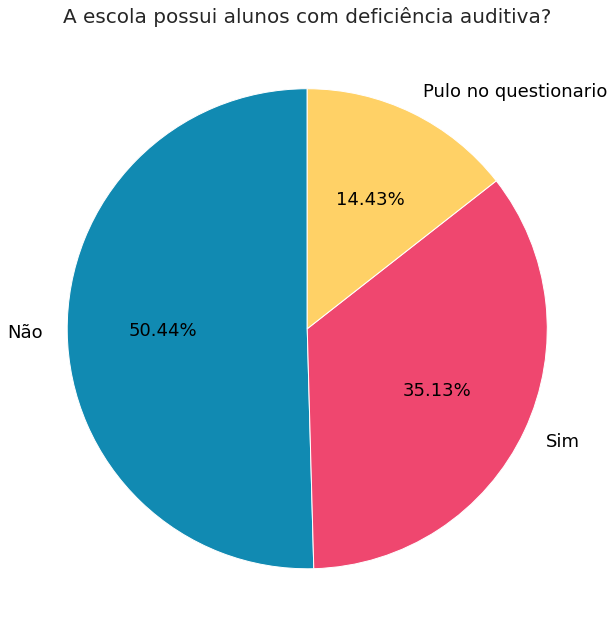

In [47]:
titulo = "A escola possui alunos com deficiência auditiva?"
pie_chart(formated_table(dados["VE01P4105"],dicio_VE01P4101),titulo)

####3.7 - A escola possui alunos com deficiência visual?

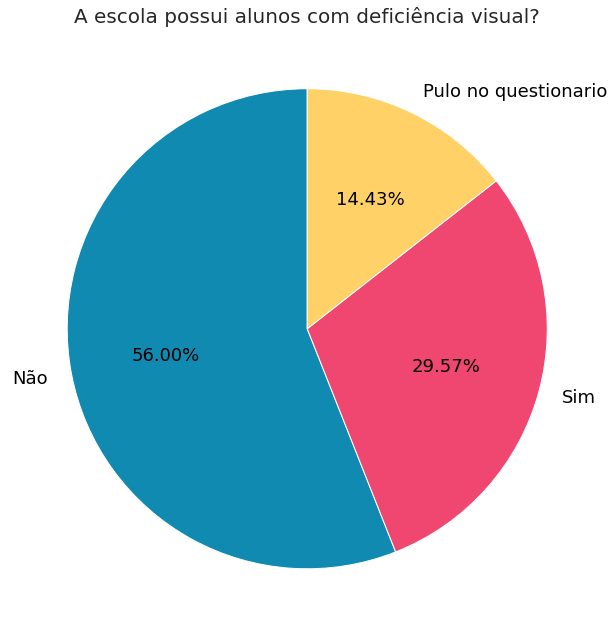

In [48]:
titulo="A escola possui alunos com deficiência visual?"
pie_chart(formated_table(dados["VE01P4106"],dicio_VE01P4101),titulo)

####3.8 - A escola possui alunos com deficiência múltipla (2 ou mais deficiências ao mesmo tempo)?

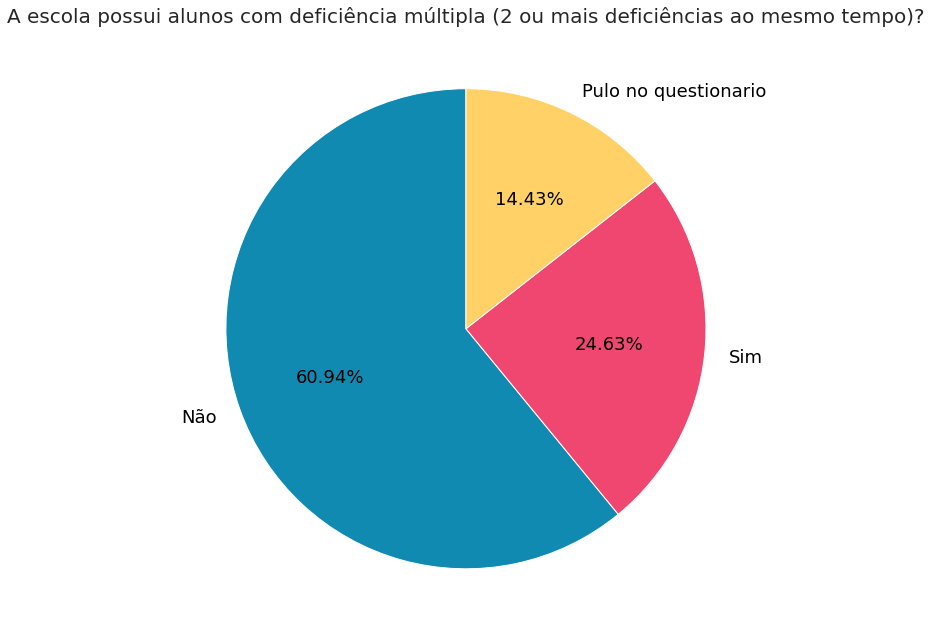

In [49]:
titulo= "A escola possui alunos com deficiência múltipla (2 ou mais deficiências ao mesmo tempo)?"
pie_chart(formated_table(dados["VE01P4107"],dicio_VE01P4101),titulo)

####3.9 - A escola possui alunos com outras deficiências?

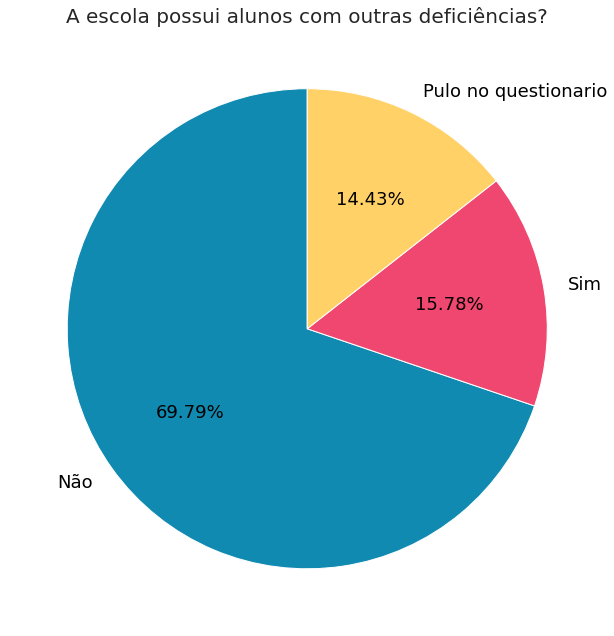

In [50]:
titulo="A escola possui alunos com outras deficiências?"
pie_chart(formated_table(dados["VE01P4108"],dicio_VE01P4101),titulo)

#### 3.10 - A escola oferece atividade física adaptada para alunos com deficiência?

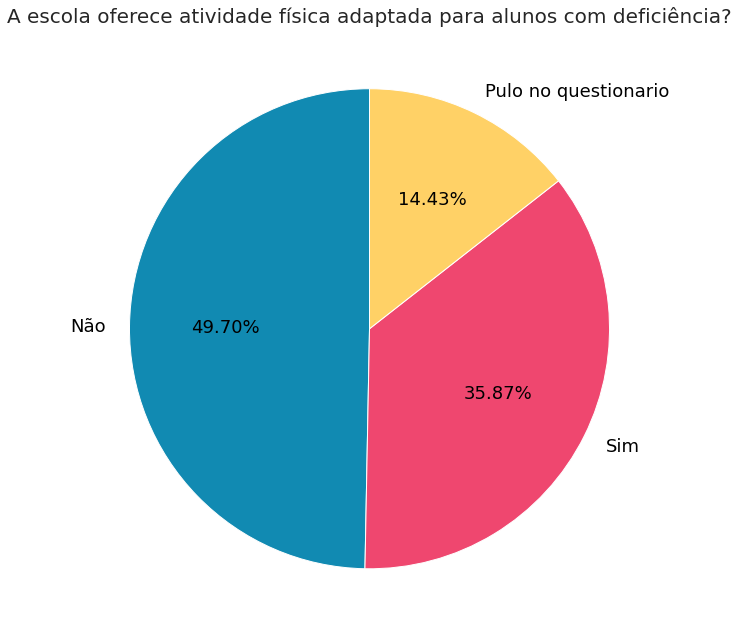

In [51]:
titulo = "A escola oferece atividade física adaptada para alunos com deficiência?"
pie_chart(formated_table(dados["VE01P42"],dicio_VE01P4101),titulo)

Aqui um ponto intrigante e até mesmo preocupante. Quase metada das escolas responderam que não oferecem atividades físicas adapatadas, o que significa que estes alunos ficam excluídos das atividades em grupo, não podendo desenvolver suas habilidades motoras.

#Conclusão

Com base nos PeNSE 2015, realizado pelo IBGE, podemos observar o comportamento das escolas para diversas questões importantes, desde o fato de possuírem ou não materiais adequados para o aprendizado dos alunos, ou mesmo para desenvolvimento físico em ambiente escolar, como também uma rápida olhada na inserção de alunos com deficiência neste ambiente. Obviamente, muita coisa pode ser analisada ainda. Temos diversas variantes a olhar, diversas conclusões, previsões, análises, etc. Tudo depende do que você busca descobrir. Creio que com esta pequena demonstração, muitos podem ter no que se inspirar, pois é compreensível que com muitas variáveis, seja fácil perder o foco. Gostaria de agradecer a você que leu tudo até aqui e se possível, dê seu feedback. Agradeço a toda turma de monitoria da **Alura** que sempre está a disposição para eventuais dúvidas. 
**Até a próxima!!!**

📚📚📚